In [97]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-31 21:15:53,121: Credentials are already in use. The existing account in the session will be replaced.


In [98]:
from qiskit import *

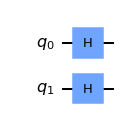

In [99]:
#We will solve Hidden Subgroup Problem(HSP) for the case when G=Z/4Z, H = {0,2}, X={0,1}, and the function f is H-periodic. 
#We will use the Standard method to solve the HSP in this case.
#Note that we will represent group elements as follows: 0 = |00>, 1 = |01>, 2=|10>, and 3 = |11>.
#The first step in the standard method is to create an initial state of the form |\psi> = \frac{1}{|G|}\sum_{g \in G}|g> \otimes |0>.
#We will start by creating a uniform superposition of the group elements of G, in this case, we need to create a state of the form  |\phi> = \frac{1}{2}(|00>+ |01> + |10> + |11>). We can do that by simply applying the Hadamard gate to each of the first two registers. 

circ = QuantumCircuit(2, name='creating the state |\phi>')
circ.h(0)
circ.h(1)

#here we draw the circuit
circ.draw()

In [100]:
#run a simulation to check that your state vector is indeed |/phi>

simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, backend = simulator).result()
stvector = result.get_statevector(circ, decimals=3)
from qiskit_textbook.tools import array_to_latex
array_to_latex(stvector, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

In [101]:
# we will convert circ to a gate and place it into the bigger circuit

sub_circ = circ.to_instruction()


circuit=QuantumCircuit(3,3)
circuit.append(sub_circ, [[0],[1]])

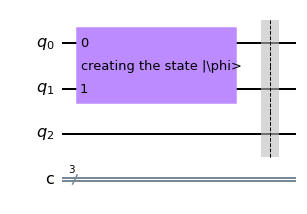

In [102]:
#we will place a barrier for convenience to indicate that the first step of the standard method is complete
circuit.barrier()

#here we draw the circuit
circuit.draw()

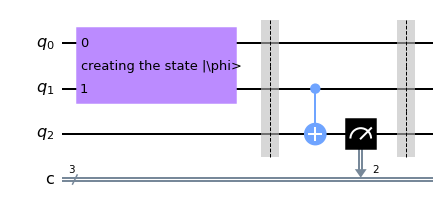

In [103]:
#we now query the H-periodic function f and XOR it with the state in the second register 
circuit.cx(1,2)

#here we measure the second register 
circuit.measure(2,2)

#we put a barrier for convenience and draw the circuit. Note that we have now created a coset state in the first two registers.
circuit.barrier()
circuit.draw()


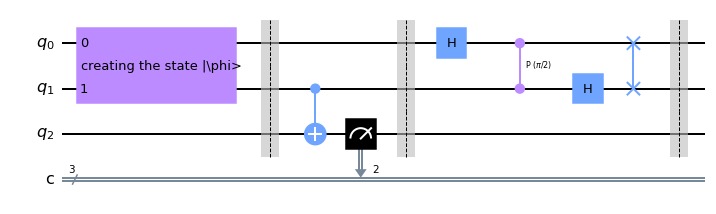

In [104]:
#we now apply QFT to the first two registers
circuit.h(0)
circuit.cp(np.pi/2, 1, 0)
circuit.h(1)
circuit.swap(0,1)

#here we again put a barrier for convenience and draw the circuit. Note that we now have created states that carry some explicit information about the hidden subgroup H. 
circuit.barrier()
circuit.draw()

In [105]:
#we measure the first two registers
circuit.measure(0,0)
circuit.measure(1,1)

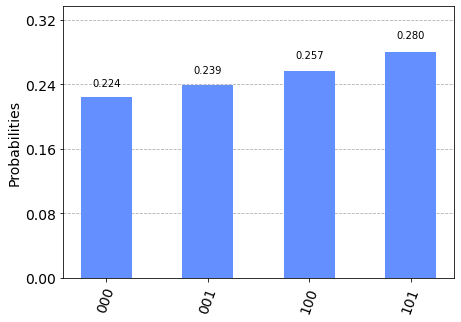

In [106]:
#we run a simulation and plot the results. Note that regardless of the measurement result of the third register we will always obtain elements of H when measuring the first two registers. Repeating this procedure will yield the entire hidden subgroup H. 
from qiskit.tools.visualization import plot_histogram
new_simulator = Aer.get_backend('qasm_simulator')
new_result = execute(circuit, backend = new_simulator, shots = 1024).result()
counts = new_result.get_counts(circuit)
plot_histogram(counts)

In [107]:
# we will run this experiment on a real quantum device
#note that you might need to provide your account information if not working directly in the IBM Quantum Lab
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_belem')
job = execute(circuit, backend = device, shots = 1024)

#it is useful to use job_monitor to monitor if your job is queued and whether it has run successfully
from qiskit.tools.monitor import job_monitor
job_monitor(job)
device_result = job.result()

Job Status: job has successfully run


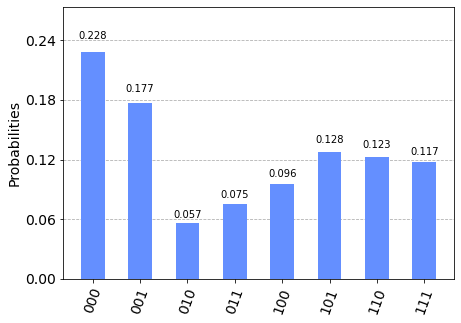

In [108]:
#we will plot device_result
#note how device_results are different from the simulation results due to noise
device_counts = device_result.get_counts(circuit)
plot_histogram(device_counts)